# Coding Masked Self-Attention in PyTroch!!!

By Josh Starmer

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

---- 

In this tutorial, we will code **Masked Self-Attention** in **[PyTorch](https://pytorch.org/)**. **Attention** is an essential component of neural network **Transformers**, which are driving the current excitement in **Large Language Models** and AI. Specifically, a **Decoder-Only Transformer**, illustrated below, is the foundation for the popular model **ChatGPT**. 

<img src="./images/dec_transformer.png" alt="a decoder-only transformer neural network" style="width: 800px;">

At the heart of **ChatGPT** is **Masked Self-Attention**, which allows it to establish relationships among the words, characters and symbols while also making it relatively easy to train the model to predict what should come next. For example, in the illustration below, where the word **it** could potentially refer to either **pizza** or **oven**, **Masked Self-Attention** could help a **Transformer** establish the correctly relationship between the word **it** and **pizza** as well as help efficiently train it to predict the words that came after, **tasted good**.

<img src="./images/masked_self_attention_1.png" alt="an illustration of how masked self-attention works" style="width: 800px;">

In this tutorial, you will...

- **[Code a Masked Self-Attention Class!!!](#masked)** The the masked self-attention class allows the transformer to establish relationships among words and tokens and be efficiently trained to predict what comes next.

- **[Calculate Masked Self-Attention Values!!!](#calculate)** We'll then use the class that we created, MaskedSelfAttention, to calculate masked self-attention values for some sample data.
 
- **[Verify The Calculations!!!](#validate)** Lastly, we'll validate the calculations made by the MaskedSelfAttention class..


----

## Masked Self-Attention Formula
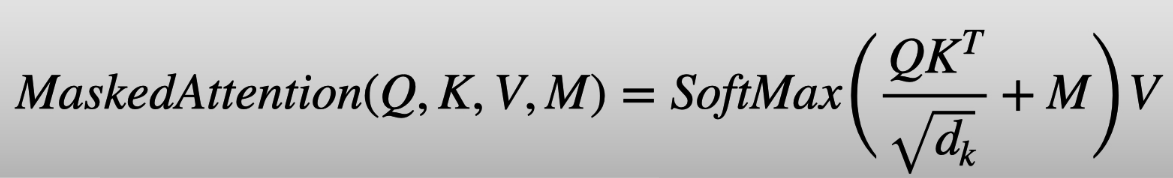

# Import the modules that will do all the work

In [1]:
import torch ## torch let's us create tensors and also provides helper functions
import torch.nn as nn ## torch.nn gives us nn.module() and nn.Linear()
import torch.nn.functional as F # This gives us the softmax()

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access <code>requirements.txt</code> file:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>

----

# Code Masked Self-Attention
<a id="masked"></a>

In [2]:
class MaskedSelfAttention(nn.Module): 
                            
    def __init__(self, d_model=2,  
                 row_dim=0, 
                 col_dim=1):
        
        super().__init__()
        
        self.W_q = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        self.W_k = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        self.W_v = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        
        self.row_dim = row_dim
        self.col_dim = col_dim

        
    def forward(self, token_encodings, mask=None):

        q = self.W_q(token_encodings)
        k = self.W_k(token_encodings)
        v = self.W_v(token_encodings)

        sims = torch.matmul(q, k.transpose(dim0=self.row_dim, dim1=self.col_dim))

        scaled_sims = sims / torch.tensor(k.size(self.col_dim)**0.5)

        if mask is not None:
            ## Here we are masking out things we don't want to pay attention to
            ##
            ## We replace values we wanted masked out
            ## with a very small negative number so that the SoftMax() function
            ## will give all masked elements an output value (or "probability") of 0.
            scaled_sims = scaled_sims.masked_fill(mask=mask, value=float('-inf')) # I've also seen -1e20 and -9e15 used in masking

        attention_percents = F.softmax(scaled_sims, dim=self.col_dim)

        attention_scores = torch.matmul(attention_percents, v)

        return attention_scores

# BAM!

----

# Calculate Masked Self-Attention
<a id="masked"></a>

In [4]:
## create a matrix of token encodings...
encodings_matrix = torch.tensor([[1.16, 0.23],
                                 [0.57, 1.36],
                                 [4.41, -2.16]])

## set the seed for the random number generator
torch.manual_seed(42)

## create a masked self-attention object
maskedSelfAttention = MaskedSelfAttention(d_model=2,
                               row_dim=0,
                               col_dim=1)

## create the mask so that we don't use
## tokens that come after a token of interest
mask = torch.tril(torch.ones(3, 3))
mask = mask == 0
mask # print out the mask

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [5]:
## calculate masked self-attention
maskedSelfAttention(encodings_matrix, mask)

tensor([[ 0.6038,  0.7434],
        [-0.0062,  0.6072],
        [ 3.4989,  2.2427]], grad_fn=<MmBackward0>)

# DOUBLE BAM!!

----

# Print Out Weights and Verify Calculations
<a id="validate"></a>

In [6]:
## print out the weight matrix that creates the queries
maskedSelfAttention.W_q.weight.transpose(0, 1)

tensor([[ 0.5406, -0.1657],
        [ 0.5869,  0.6496]], grad_fn=<TransposeBackward0>)

In [7]:
## print out the weight matrix that creates the queries
maskedSelfAttention.W_q.weight.transpose(0, 1)

tensor([[ 0.5406, -0.1657],
        [ 0.5869,  0.6496]], grad_fn=<TransposeBackward0>)

In [ ]:
## print out the weight matrix that creates the keys
maskedSelfAttention.W_k.weight.transpose(0, 1)

In [ ]:
## print out the weight matrix that creates the values
maskedSelfAttention.W_v.weight.transpose(0, 1)

In [ ]:
## calculate the queries
maskedSelfAttention.W_q(encodings_matrix)

In [ ]:
## calculate the keys
maskedSelfAttention.W_k(encodings_matrix)

In [ ]:
## calculate the values
maskedSelfAttention.W_v(encodings_matrix)

In [ ]:
q = maskedSelfAttention.W_q(encodings_matrix)
q

In [ ]:
k = maskedSelfAttention.W_k(encodings_matrix)
k

In [ ]:
sims = torch.matmul(q, k.transpose(dim0=0, dim1=1))
sims

In [ ]:
scaled_sims = sims / (torch.tensor(2)**0.5)

In [ ]:
scaled_sims

In [ ]:
masked_scaled_sims = scaled_sims.masked_fill(mask=mask, value=-1e9)
masked_scaled_sims

In [ ]:
attention_percents = F.softmax(masked_scaled_sims, dim=1)
attention_percents

In [ ]:
torch.matmul(attention_percents, maskedSelfAttention.W_v(encodings_matrix))

# TRIPLE BAM!!!